# Question 6B: Trapeziod Method (Euler Predictor-Corrector)

The more general form of a first order Ordinary Differential Equation is: $$ y′=f(x,y) $$
 
This can be solved analytically by integrating both sides but this is not straight forward for most problems. Numerical methods can be used to approximate the solution at discrete points.

$$ y' = f(x,y) = \frac{x^{3}}{y} $$ 

Initial Condition $ y(0) = 1 $

Boundary $ 0 \le x \le 10 $

Step Size $ h = 0.01 $

Actual Solution $ y(x) = \sqrt{\frac{1}{2}x^{4}+1} $





In [1]:
## Library
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

## Defining the Function

In [2]:
def myfun_xy(x,y):
    return (x**3*y)


## Discrete Interval 
Here we will use two different steps sizes on the  $ 0 \leq x \leq 10 $.
### Interval
The step Size will be $h = 0.01$

with the discrete time steps,
$$ x_{i} = 0 + i0.01 $$
for  $i=0,1,...,1000$.

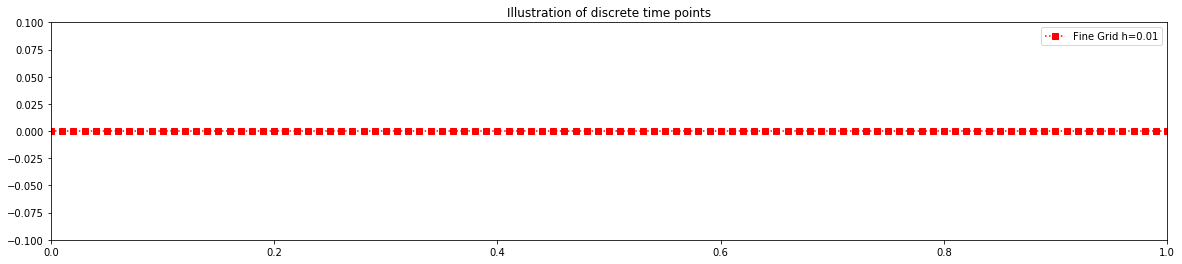

In [3]:
# Start and end of interval
b=2
a=0
# Steps N1=400
N1=200
#N2=200
h1=0.01
#h2=0.05

x1=np.arange(a,b+h1,h1)
#x2=np.arange(a,b+h2,h2)

fig = plt.figure(figsize=(20,4))
plt.plot(x1,0*x1,'s:',color='red',label='Fine Grid h=%s'%(h1))
#plt.plot(x2,0*x2+.05,'v:',color='blue',label='Fine Grid h=%s'%(h2))

plt.xlim((0,1))
plt.ylim((-0.1,0.1))
plt.title('Illustration of discrete time points')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Analytic (Exact) solution')

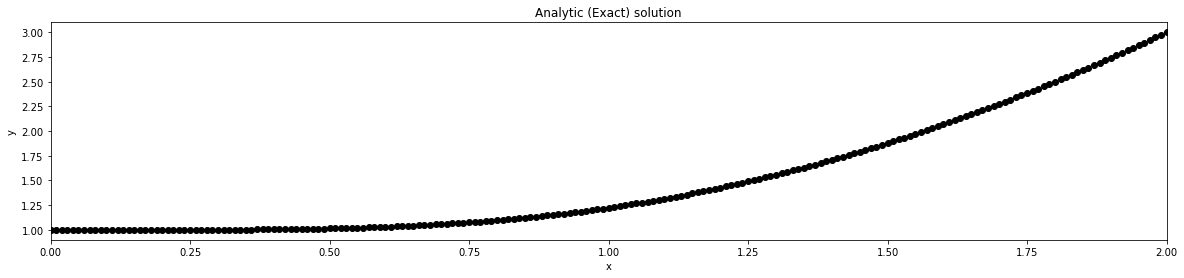

In [5]:
## Analytic Solution y
y1= (0.5*x1**4+1)**0.5
#y2= -((x2**3 + x2 +1)**(-1))

fig = plt.figure(figsize=(20,4))
plt.plot(x1,y1,'o:',color='black')
#plt.plot(x2,y2,'v:',color='blue')
plt.xlim((0,2))
plt.xlabel('x')
plt.ylabel('y')

plt.title('Analytic (Exact) solution')

## Setting up the inital Conditions
$$ w_{0} = 2 $$

In [6]:
IC=1 # Intial condtion
w1 = np.zeros(N1+1)
z1 = np.zeros(N1+1)
# v1 = np.zeros(N1+1)
# v1bar = np.zeros(N1+1)
w1[0]=IC
z1[0]=IC
# v1bar[0]=IC
# v1[0]=IC


# w2 = np.zeros(N2+1)
# v2 = np.zeros(N2+1)
# v2bar = np.zeros(N2+1)
# w2[0]=IC
# v2bar[0]=IC
# v2[0]=IC


## Trapezoid Method
Assuming uniform stepsize  $x_{i+1} − x_{i}$ is replaced by  h, re-arranging the equation gives:
$$ w_{i+1} = w_{i} + \frac{h}{2}(f(x_{i},w_{i}) + f(x_{i+1},z_{i+1}) ) $$

$$ z_{i+1} = w_{i} + hf(x_{i}, w_{i}) $$





Text(0.5, 1.0, 'Analytic and Trapeziod Method solution')

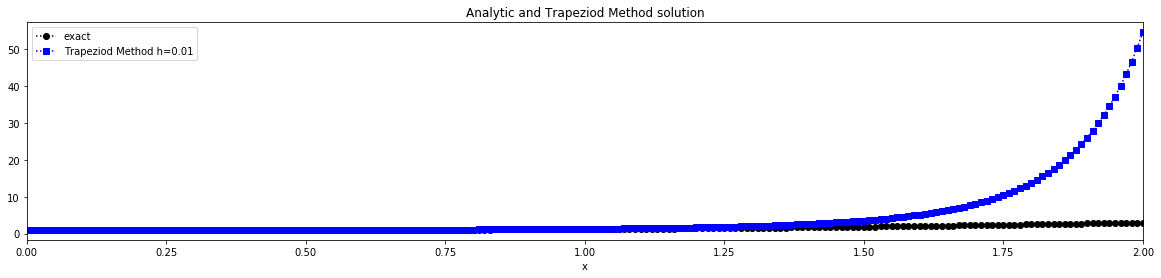

In [8]:

for i in range (0,N1):
    z1[i]=w1[i]+h1*myfun_xy(x1[i], w1[i])
    w1[i+1]=w1[i]+h1/2*(myfun_xy(x1[i], w1[i]) + myfun_xy(x1[i+1], z1[i]))
    

fig = plt.figure(figsize=(20,4))
plt.plot(x1,y1,'o:',color='black',label='exact')
plt.plot(x1,w1,'s:',color='blue',label='Trapeziod Method h=0.01')

plt.xlim((0,2))
plt.xlabel('x')
plt.legend(loc='best')
plt.title('Analytic and Trapeziod Method solution')

In [9]:
table = ListTable()
table.append(['x', 'w1 TM h=0.01', 'Exact',
              'TM Err 0.01', '% Err TM 0.01'])
tableSize = 10
for i in range (0,tableSize+1):
    table.append([round(x1[i],5), round(w1[i],5), round(y1[i],5),
                  round(abs(y1[i]-w1[i]),8), 
                 round(abs(y1[i]-w1[i])/abs(y1[i])*100,5)])
    
table.append(['Max',' ' ,' ' 
              , round(max(abs(y1-w1)),5)])
table

x,w1 TM h=0.01,Exact,TM Err 0.01,% Err TM 0.01
0.0,1.0,1.0,0.0,0.0
0.01,1.0,1.0,0.0,0.0
0.02,1.0,1.0,1e-08,0.0
0.03,1.0,1.0,2e-08,0.0
0.04,1.0,1.0,4e-08,0.0
0.05,1.0,1.0,6e-08,1e-05
0.06,1.0,1.0,9e-08,1e-05
0.07,1.00001,1.00001,1.2e-07,1e-05
0.08,1.00001,1.00001,1.6e-07,2e-05
0.09,1.00002,1.00002,2e-07,2e-05
